## Write Code in Empty cells don't use existing cells otherwise output will be earesed use new cells to write code

#### Import Related Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

download data set from this link

[h1b.csv](https://drive.google.com/file/d/1GHotByxQaCXKPAuNI7dqIMiOMdmnkOzN/view?usp=sharing)

### read csv in Pandas DataFrame 

In [2]:
df = pd.read_csv('h1b.csv')


In [3]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


### show columns

In [4]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### delete 'unnamed:0'  column from data set

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

## check no of rows in data frame

In [7]:
df.shape[0]

3002458

In [20]:
df.isna().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

## Drop All rows which has any NA value and show first 5 rows after this operation

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


## reset index and check how many rows you have 

,lat,lon
0,42.280826,-83.743038
1,33.019843,-96.698886
2,40.728158,-74.077642
3,39.739236,-104.990251
4,38.627003,-90.199404


In [10]:
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)

In [11]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [12]:
df.shape[0]


2877765

## Write a code to find out top 15 hiring company (Employer Name) 

In [13]:
df['EMPLOYER_NAME'].value_counts().head()

INFOSYS LIMITED                      130257
TATA CONSULTANCY SERVICES LIMITED     64273
WIPRO LIMITED                         45673
DELOITTE CONSULTING LLP               35999
IBM INDIA PRIVATE LIMITED             33585
Name: EMPLOYER_NAME, dtype: int64

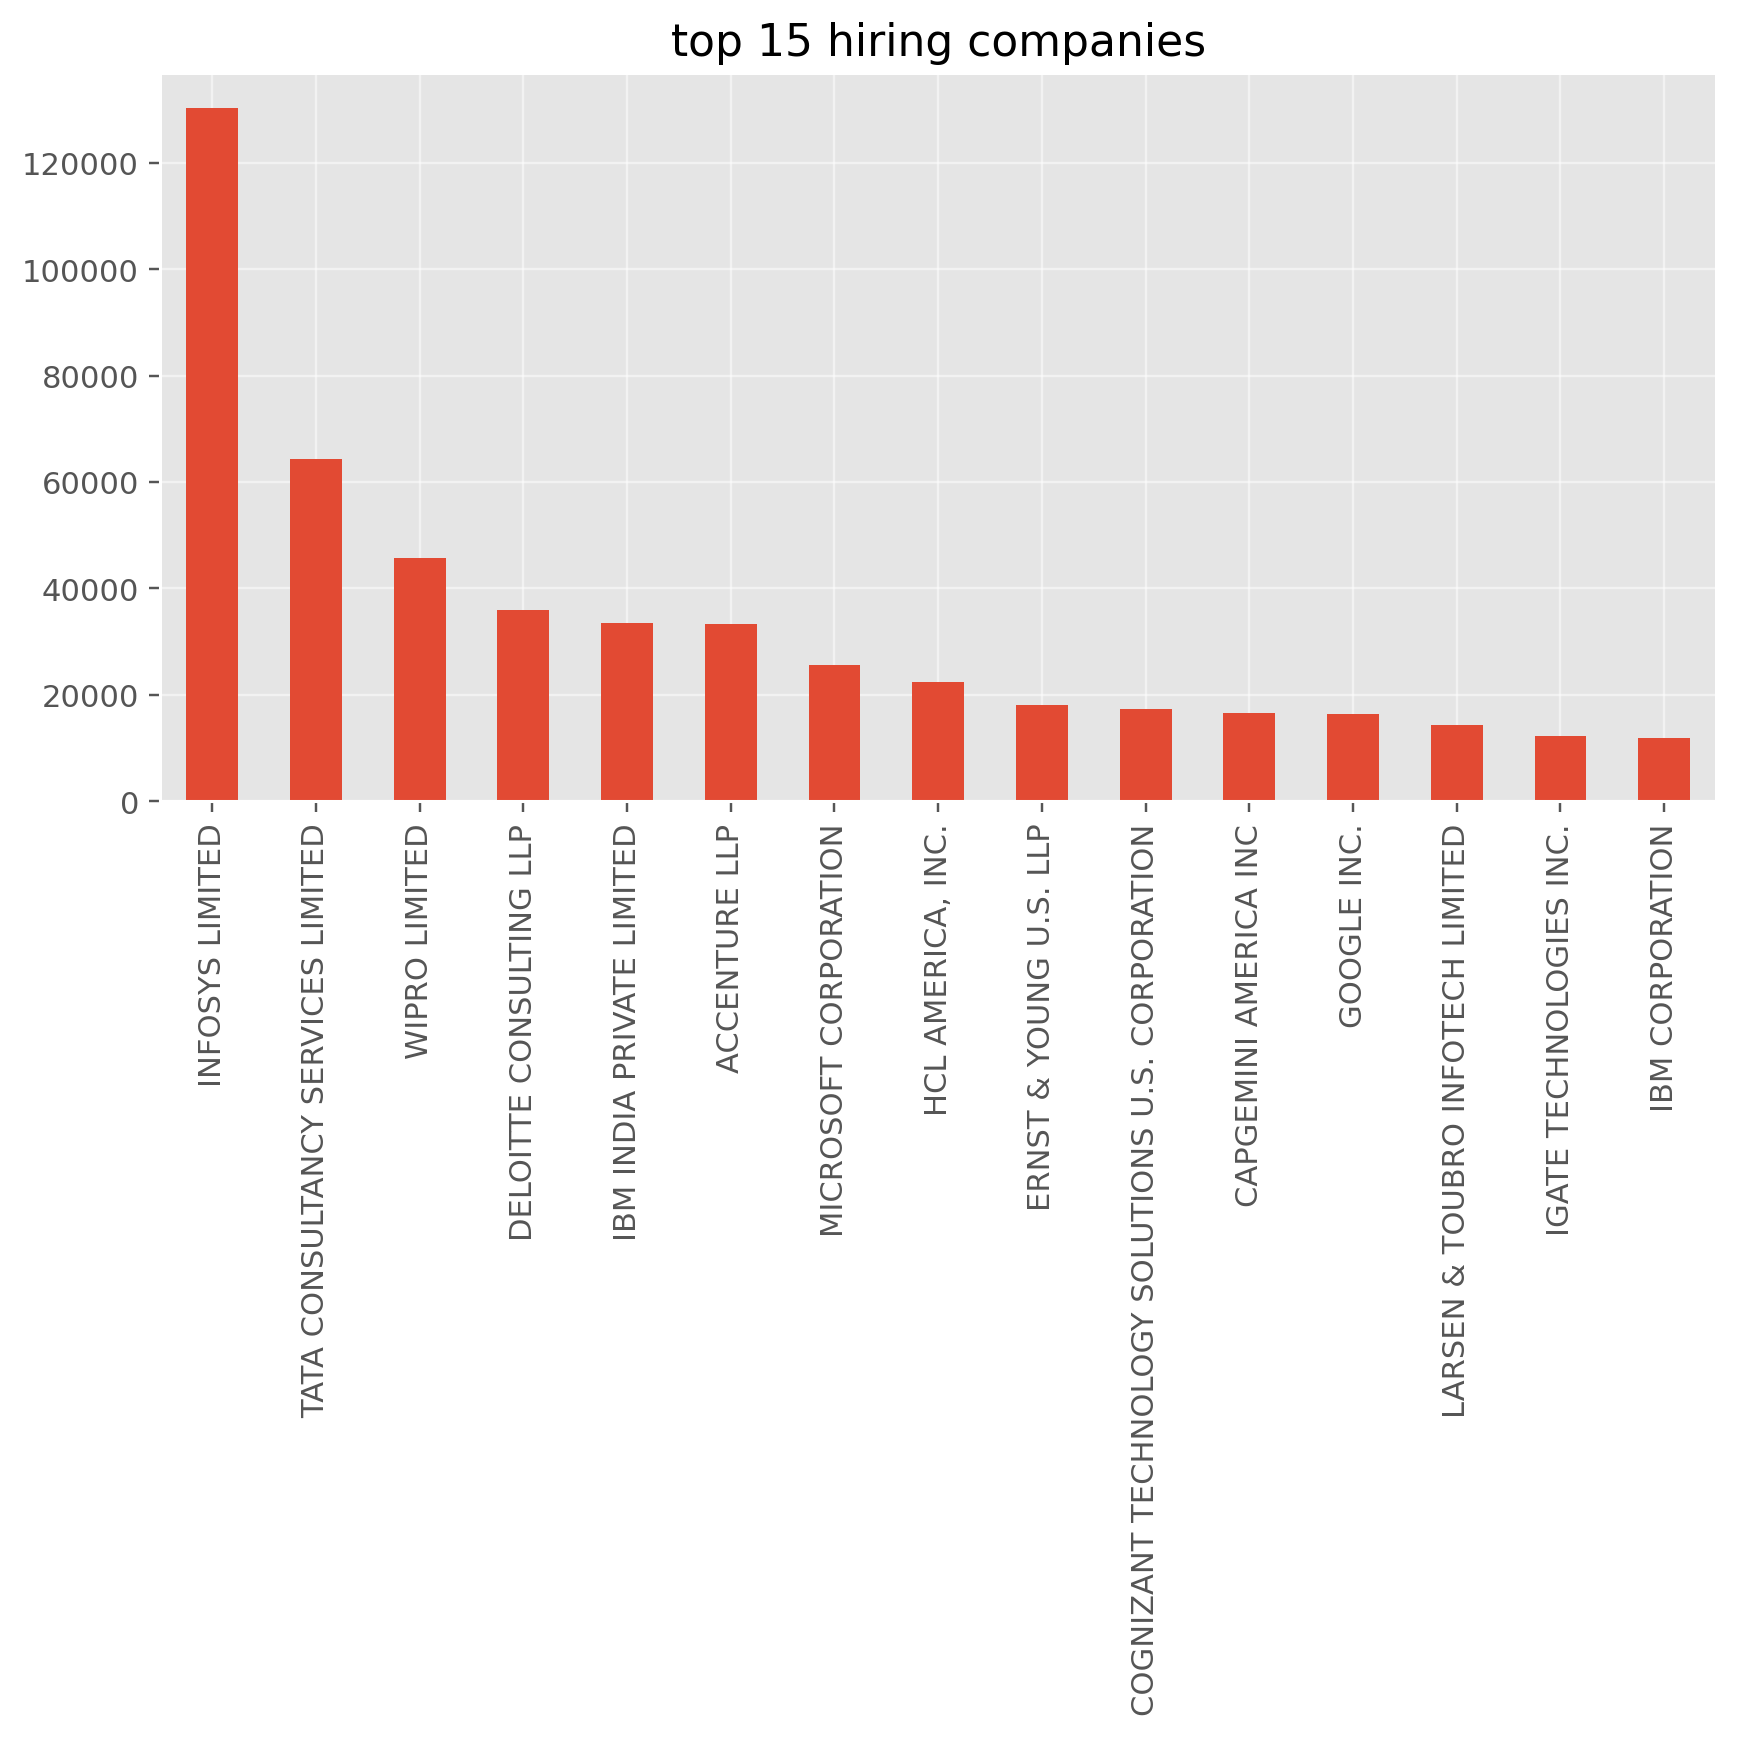

In [34]:
plt.figure(dpi=220,figsize=(8,8))
plt.style.use('ggplot')
plt.title('top 15 hiring companies')
df['EMPLOYER_NAME'].value_counts()[:15].plot(kind='bar')
plt.grid(ls='-',alpha=0.5)
plt.tight_layout()
plt.savefig('top 15 hiring companies.png')
plt.show()


### Top 15 companies which provide highest PREVALING WAGE

In [15]:
wages = df['PREVAILING_WAGE'].value_counts().head()
col1 = df.loc[df['PREVAILING_WAGE'].value_counts().head().index,'EMPLOYER_NAME']

df_x = pd.DataFrame({"company":col1,"salary":wages})
df_x.reset_index(drop=True)


,company,salary
0,KPMG LLP,10185
1,ERNST & YOUNG U.S. LLP,6745
2,"ALCOA, INC.",6480
3,"SOUTH EAST WORLD WIDE, LTD.",5683
4,DELOITTE TAX LLP,5492


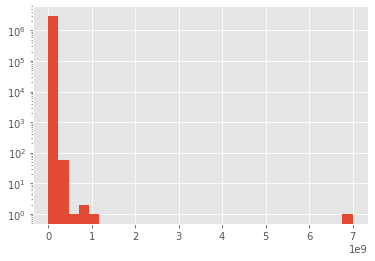

In [35]:
df['PREVAILING_WAGE'].hist(bins=30)
plt.yscale('log')
plt.show()

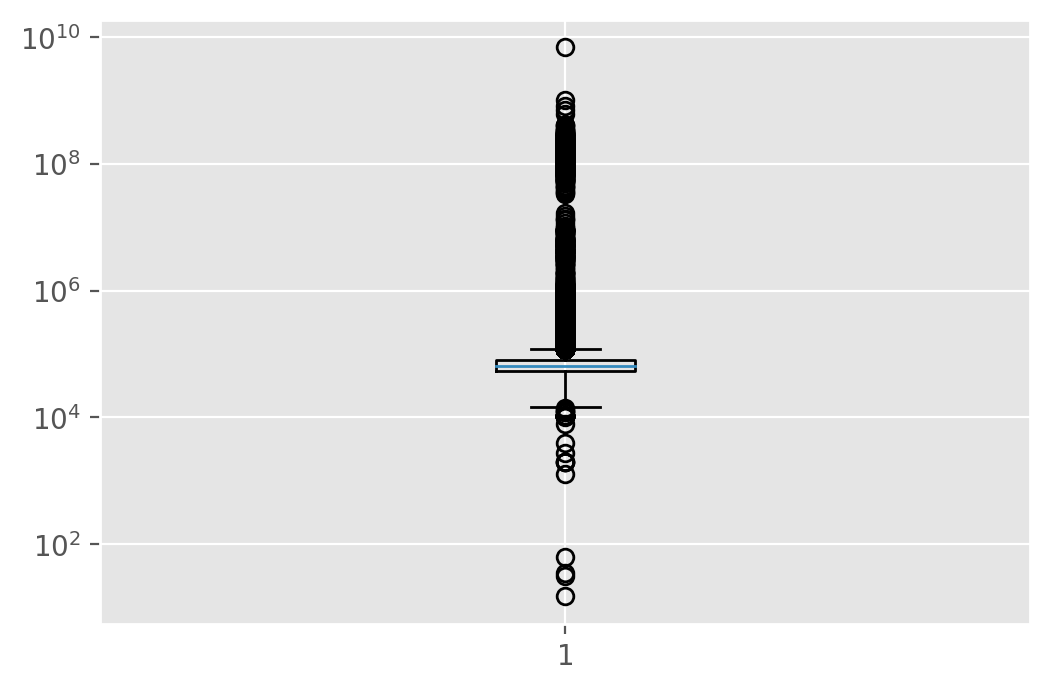

In [37]:
plt.figure(dpi=200)
plt.boxplot(df["PREVAILING_WAGE"])
plt.yscale("log")
plt.show()

##### Average PREVAILING WAGE

In [16]:
df['PREVAILING_WAGE'].mean()

145166.64888402403

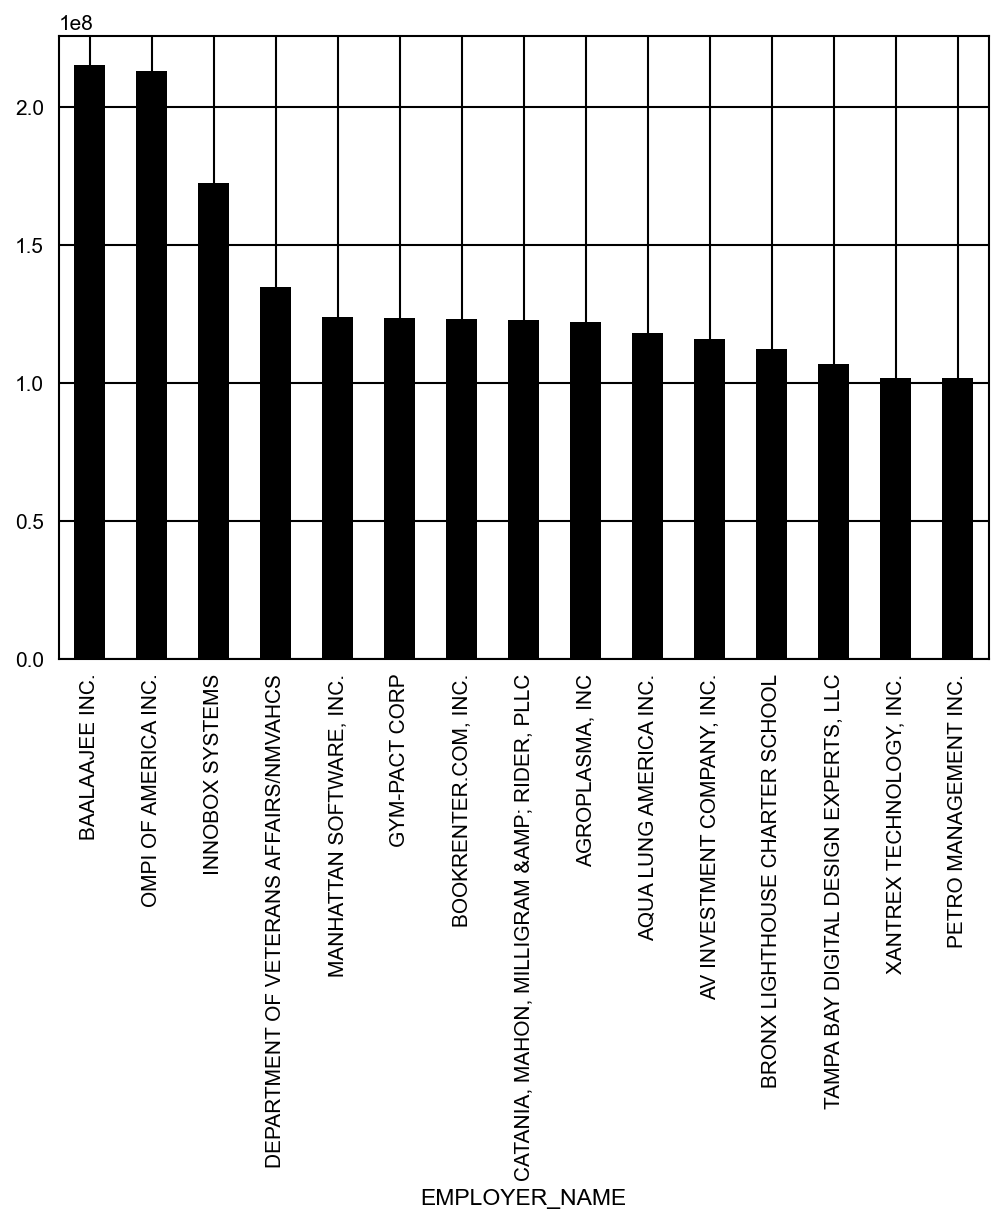

In [54]:
#this is not for top 20 prevailing wages. but this plot should be for 
#average pay by each company.then we should groupby by companies
plt.figure(dpi=150)
plt.style.use('grayscale')
df.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].median().sort_values(ascending=False)[:15].plot(kind='bar')
plt.show()

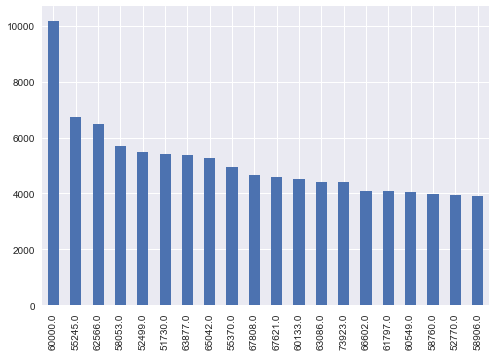

In [39]:
plt.style.use('seaborn')
df['PREVAILING_WAGE'].value_counts().head(20).plot(kind='bar')
plt.show()

### Top 20 WORKSITE 

In [57]:
df['WORKSITE'].value_counts().head(20)

NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

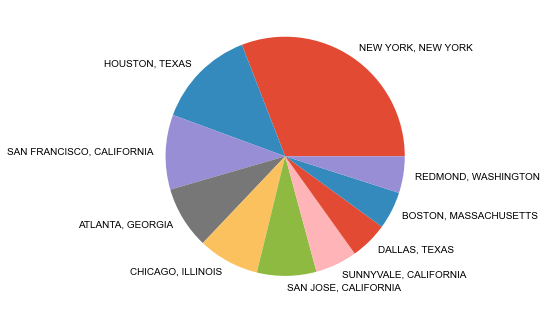

In [67]:
plt.style.use('ggplot')
ans = (df["WORKSITE"].value_counts()[:10]/df.shape[0])*100
values = ans.values
labels = ans.index
plt.pie(values,labels=labels)
plt.show()

<AxesSubplot:>

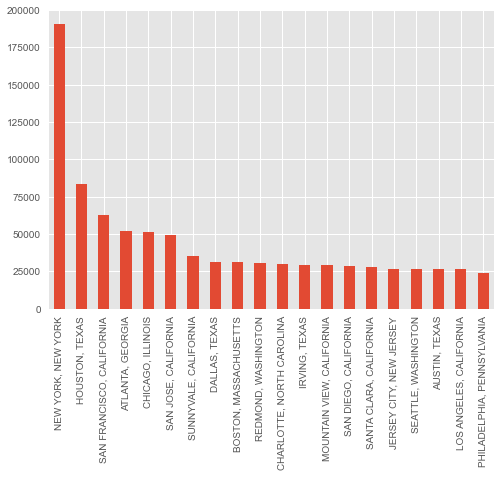

In [68]:
df['WORKSITE'].value_counts().head(20).plot(kind='bar')

### head of Worksite Column

In [69]:
df['WORKSITE'].head()

0        ANN ARBOR, MICHIGAN
1               PLANO, TEXAS
2    JERSEY CITY, NEW JERSEY
3           DENVER, COLORADO
4        ST. LOUIS, MISSOURI
Name: WORKSITE, dtype: object

### Show Column Names

In [70]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Apply a Function on DataFrame to gather only State Name from Worksite

    eg. worksite name current -  SAN FRANCISCO, CALIFORNIA
        worksite name after - CALIFORNIA
        
**note**: there sholud not be any space at the begning or end of worksite name

In [71]:
def select(n):
    n = n.split()
    return n[-1]
df2 = df['WORKSITE'].apply(select)
df2.head(10)

0        MICHIGAN
1           TEXAS
2          JERSEY
3        COLORADO
4        MISSOURI
5         FLORIDA
6           TEXAS
7      CALIFORNIA
8        VIRGINIA
9    PENNSYLVANIA
Name: WORKSITE, dtype: object

**note:** if you view your analysis than you will find that 'MARIANA ISLANDS' worksite name is replaced with NA values

### Replace all NA records in your Worksite Column with Value  'MARIANA ISLANDS' 


In [ ]:
df.fillna(value="MARIANA ISLANDS")

### Print out how many unique Worksites are there

In [ ]:
len(df['WORKSITE'].unique())

In [ ]:
?

##### show column names 

#### Rename you column names as

    {'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATE','lon':'LON','lat':'LAT'}

#### Now Remove all Columns Except these columns 

    'CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"

__show colnames__

#### Perform These Operations 

    Precise LON and LAT columns upto 2 decimal palaces
    
    Convert YEAR Column into String
    
    Convert PREV_WAGE column into Integer

__show top 3 values to check above operations__

### __show unique values of CASE_STATUS Column__

# Calculate the petitions distributions by status

In [ ]:
from matplotlib.pyplot import pie,axis,show
import matplotlib as mpl

#### PETITIONS BY CASE STATUS

# Calculating the petitions distributions by year

In [ ]:
sn.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,3))
plt.title('petitions distributions by year')
sn.countplot(f['YEAR'])

In [ ]:
denied = f[f.CASE_STATUS == 'DENIED']
len(denied)

In [ ]:
del denied['CASE_STATUS']

In [ ]:
denied = denied.reset_index()
denied.head(3)

In [ ]:
denied_year_count = [0]* 6

In [ ]:
for i in range(0,6):
    denied_year_count[i] = denied[denied.YEAR == years[i]]['YEAR'].count()

In [ ]:
denied_year_count

### Denied PETITIONS DISTRIBUTION BY YEAR

#### Denied % Rate By Year

## Calculate the number of petitions filed by the States

**unique stats sorted**

# Number of petitions denied by the state

__total denied petitions__

## % Rate of Denied Petitions by State 

#### Find out how many applied for Illinois State and how many how them are Denied 

#### How Many People are Certified for Job title 'CHIEF PROCESS OFFICER'  who applied for state  Illinois 

# Top 25 Job Titles

In [ ]:
df['JOB_TITLE'].value_counts().head(25)

!!! Great Now Make Your Own Questions and Try to Answer Them !!